# 5. Analysing the correlation between the chosen variables

## Contents
Importing libraries<br>
Resetting library options<br>
Defining 'path' variable<br>
Importing dataframe<br>
Creating lagged variables<br>
Correlation matrix including the lagged variables<br>
Evaluating the correlation matrix<br>
Exporting the dataframe with lagged variables<br>

## Importing libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Resetting lybrary options

In [2]:
# resetting librarie options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

## Defining 'path' variable

In [3]:
# defining path variable
path = r"C:\Users\khand\Desktop\Careerfoundry\Data Immersion\Achievement - 6\Project - IMF Data Analysis"

## Importing dataframe

In [4]:
# importing the updated overall cpi and pcps variables merged dataframe
df_cpi_pcps = pd.read_csv(os.path.join(path, '2. Data', 'Prepared Data', 'overall_cpi_pcps_merged_outliers_flagged_csv.csv'), index_col = False)
df_cpi_pcps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22752 entries, 0 to 22751
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   country_name                              22752 non-null  object 
 1   month_code                                22752 non-null  object 
 2   year                                      22752 non-null  int64  
 3   month_number                              22752 non-null  int64  
 4   consumer_price_index_all_items            22752 non-null  float64
 5   agr_raw_material_index                    22752 non-null  float64
 6   agriculture                               22752 non-null  float64
 7   all_index                                 22752 non-null  float64
 8   all_metals_ex_gold_index                  22752 non-null  float64
 9   all_metals_index                          22752 non-null  float64
 10  apsp_crude_oil_us_dollar_per_bbl  

In [5]:
# importing the pcps cleaned dataframe
df_pcps = pd.read_csv(os.path.join(path, '2. Data', 'Prepared Data', 'pcps_data_clean_csv.csv'), index_col = False)

In [6]:
# chcking the pcps dataframe
df_pcps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   month_code                                233 non-null    object 
 1   agr_raw_material_index                    233 non-null    float64
 2   agriculture                               233 non-null    float64
 3   all_index                                 233 non-null    float64
 4   all_metals_ex_gold_index                  233 non-null    float64
 5   all_metals_index                          233 non-null    float64
 6   apsp_crude_oil_us_dollar_per_bbl          233 non-null    float64
 7   beverages_index                           233 non-null    float64
 8   coal_index                                233 non-null    float64
 9   commodities_for_index_all_excluding_gold  233 non-null    float64
 10  energy_index                          

In [7]:
# isolating only the required variables for lag analysis 
df_lag = df_pcps.iloc[:, :2]
df_lag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   month_code              233 non-null    object 
 1   agr_raw_material_index  233 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.8+ KB


In [8]:
# extracting month number and year from month_code column
df_lag[['year', 'month_number']] = df_lag['month_code'].str.split('M', n = 2, expand = True)

In [9]:
# checking the updated dataframe
df_lag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   month_code              233 non-null    object 
 1   agr_raw_material_index  233 non-null    float64
 2   year                    233 non-null    object 
 3   month_number            233 non-null    object 
dtypes: float64(1), object(3)
memory usage: 7.4+ KB


In [10]:
# changing data types of 'Year and 'month_number column
df_lag[['year', 'month_number']] = df_lag[['year', 'month_number']].astype('int64')
df_lag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   month_code              233 non-null    object 
 1   agr_raw_material_index  233 non-null    float64
 2   year                    233 non-null    int64  
 3   month_number            233 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 7.4+ KB


In [11]:
# sorting the dataframe
df_lag_sorted = df_lag.sort_values(['year', 'month_number']).reset_index(drop = True)
df_lag_sorted.head(36)

,month_code,agr_raw_material_index,year,month_number
0,2003M1,75.818524,2003,1
1,2003M2,76.401557,2003,2
2,2003M3,75.989059,2003,3
3,2003M4,77.515072,2003,4
4,2003M5,74.864642,2003,5
5,2003M6,76.350811,2003,6
6,2003M7,76.820276,2003,7
7,2003M8,77.650758,2003,8
8,2003M9,79.225378,2003,9
9,2003M10,83.039186,2003,10


## Creating lagged variables

In [12]:
# creating lists of lagged values
one_m_lag = df_lag_sorted['agr_raw_material_index'].shift(periods = 1, axis = 0)
two_m_lag = df_lag_sorted['agr_raw_material_index'].shift(periods = 2, axis = 0)
three_m_lag = df_lag_sorted['agr_raw_material_index'].shift(periods = 3, axis = 0)
four_m_lag = df_lag_sorted['agr_raw_material_index'].shift(periods = 4, axis = 0)
five_m_lag = df_lag_sorted['agr_raw_material_index'].shift(periods = 5, axis = 0)
six_m_lag = df_lag_sorted['agr_raw_material_index'].shift(periods = 6, axis = 0)
seven_m_lag = df_lag_sorted['agr_raw_material_index'].shift(periods = 7, axis = 0)
eight_m_lag = df_lag_sorted['agr_raw_material_index'].shift(periods = 8, axis = 0)
nine_m_lag = df_lag_sorted['agr_raw_material_index'].shift(periods = 9, axis = 0)
ten_m_lag = df_lag_sorted['agr_raw_material_index'].shift(periods = 10, axis = 0)
eleven_m_lag = df_lag_sorted['agr_raw_material_index'].shift(periods = 11, axis = 0)
twelve_m_lag = df_lag_sorted['agr_raw_material_index'].shift(periods = 12, axis = 0)

# can use df.groupby('var_1')['var_2'].shift(periods = n, axis = bool) to shift within groups

In [13]:
# assigning the lists as new lagged columns
df_lag_sorted['one_month_lag'] = one_m_lag
df_lag_sorted['two_month_lag'] = two_m_lag
df_lag_sorted['three_month_lag'] = three_m_lag
df_lag_sorted['four_month_lag'] = four_m_lag
df_lag_sorted['five_month_lag'] = five_m_lag
df_lag_sorted['six_month_lag'] = six_m_lag
df_lag_sorted['seven_month_lag'] = seven_m_lag
df_lag_sorted['eight_month_lag'] = eight_m_lag
df_lag_sorted['nine_month_lag'] = nine_m_lag
df_lag_sorted['ten_month_lag'] = ten_m_lag
df_lag_sorted['eleven_month_lag'] = eleven_m_lag
df_lag_sorted['twelve_month_lag'] = twelve_m_lag

df_lag_sorted.head(244)

,month_code,agr_raw_material_index,year,month_number,one_month_lag,two_month_lag,three_month_lag,four_month_lag,five_month_lag,six_month_lag,seven_month_lag,eight_month_lag,nine_month_lag,ten_month_lag,eleven_month_lag,twelve_month_lag
0,2003M1,75.818524,2003,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003M2,76.401557,2003,2,75.818524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003M3,75.989059,2003,3,76.401557,75.818524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003M4,77.515072,2003,4,75.989059,76.401557,75.818524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2003M5,74.864642,2003,5,77.515072,75.989059,76.401557,75.818524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2003M6,76.350811,2003,6,74.864642,77.515072,75.989059,76.401557,75.818524,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2003M7,76.820276,2003,7,76.350811,74.864642,77.515072,75.989059,76.401557,75.818524,NaN,NaN,NaN,NaN,NaN,NaN
7,2003M8,77.650758,2003,8,76.820276,76.350811,74.864642,77.515072,75.989059,76.401557,75.818524,NaN,NaN,NaN,NaN,NaN
8,2003M9,79.225378,2003,9,77.650758,76.820276,76.350811,74.864642,77.515072,75.989059,76.401557,75.818524,NaN,NaN,NaN,NaN
9,2003M10,83.039186,2003,10,79.225378,77.650758,76.820276,76.350811,74.864642,77.515072,75.989059,76.401557,75.818524,NaN,NaN,NaN


In [14]:
# removing records with null values 
df_lag_vars = df_lag_sorted.dropna()
df_lag_vars.isnull().sum()

month_code                0
agr_raw_material_index    0
year                      0
month_number              0
one_month_lag             0
two_month_lag             0
three_month_lag           0
four_month_lag            0
five_month_lag            0
six_month_lag             0
seven_month_lag           0
eight_month_lag           0
nine_month_lag            0
ten_month_lag             0
eleven_month_lag          0
twelve_month_lag          0
dtype: int64

In [15]:
# dropping the original 'agr_raw_material_index' column
df_lag_vars = df_lag_vars.drop(columns = ['agr_raw_material_index'])
df_lag_vars.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 12 to 232
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   month_code        221 non-null    object 
 1   year              221 non-null    int64  
 2   month_number      221 non-null    int64  
 3   one_month_lag     221 non-null    float64
 4   two_month_lag     221 non-null    float64
 5   three_month_lag   221 non-null    float64
 6   four_month_lag    221 non-null    float64
 7   five_month_lag    221 non-null    float64
 8   six_month_lag     221 non-null    float64
 9   seven_month_lag   221 non-null    float64
 10  eight_month_lag   221 non-null    float64
 11  nine_month_lag    221 non-null    float64
 12  ten_month_lag     221 non-null    float64
 13  eleven_month_lag  221 non-null    float64
 14  twelve_month_lag  221 non-null    float64
dtypes: float64(12), int64(2), object(1)
memory usage: 27.6+ KB


In [16]:
# creating subset of cpi and pcps merged dataframe with relevant variables only
df_cpi_arm = df_cpi_pcps.drop(df_cpi_pcps.iloc[:, 6:23], axis = 1)
df_cpi_arm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22752 entries, 0 to 22751
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country_name                    22752 non-null  object 
 1   month_code                      22752 non-null  object 
 2   year                            22752 non-null  int64  
 3   month_number                    22752 non-null  int64  
 4   consumer_price_index_all_items  22752 non-null  float64
 5   agr_raw_material_index          22752 non-null  float64
 6   outlier_country_flag            22752 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.2+ MB


In [17]:
# merging the lagged variables with the trimmed cpi and pcps merged dataframe
df_cpi_arm_lag_vars = df_cpi_arm.merge(df_lag_vars.drop(columns = ['year', 'month_number']), on = ['month_code'], how = 'left', indicator = True) 
df_cpi_arm_lag_vars.head(288)

,country_name,month_code,year,month_number,consumer_price_index_all_items,agr_raw_material_index,outlier_country_flag,one_month_lag,two_month_lag,three_month_lag,four_month_lag,five_month_lag,six_month_lag,seven_month_lag,eight_month_lag,nine_month_lag,ten_month_lag,eleven_month_lag,twelve_month_lag,_merge
0,Albania,2010M1,2010,1,82.366797,114.963066,Non-outlier country,111.837823,106.671734,101.639837,98.559927,97.949867,93.291701,92.929580,93.814184,89.335811,85.963628,89.060320,92.051375,both
1,Albania,2010M2,2010,2,83.623075,115.227491,Non-outlier country,114.963066,111.837823,106.671734,101.639837,98.559927,97.949867,93.291701,92.929580,93.814184,89.335811,85.963628,89.060320,both
2,Albania,2010M3,2010,3,83.691822,120.258943,Non-outlier country,115.227491,114.963066,111.837823,106.671734,101.639837,98.559927,97.949867,93.291701,92.929580,93.814184,89.335811,85.963628,both
3,Albania,2010M4,2010,4,83.321715,127.878763,Non-outlier country,120.258943,115.227491,114.963066,111.837823,106.671734,101.639837,98.559927,97.949867,93.291701,92.929580,93.814184,89.335811,both
4,Albania,2010M5,2010,5,83.691822,125.810596,Non-outlier country,127.878763,120.258943,115.227491,114.963066,111.837823,106.671734,101.639837,98.559927,97.949867,93.291701,92.929580,93.814184,both
5,Albania,2010M6,2010,6,81.904519,125.206181,Non-outlier country,125.810596,127.878763,120.258943,115.227491,114.963066,111.837823,106.671734,101.639837,98.559927,97.949867,93.291701,92.929580,both
6,Albania,2010M7,2010,7,81.495705,121.277122,Non-outlier country,125.206181,125.810596,127.878763,120.258943,115.227491,114.963066,111.837823,106.671734,101.639837,98.559927,97.949867,93.291701,both
7,Albania,2010M8,2010,8,82.128113,123.996188,Non-outlier country,121.277122,125.206181,125.810596,127.878763,120.258943,115.227491,114.963066,111.837823,106.671734,101.639837,98.559927,97.949867,both
8,Albania,2010M9,2010,9,82.722303,130.106190,Non-outlier country,123.996188,121.277122,125.206181,125.810596,127.878763,120.258943,115.227491,114.963066,111.837823,106.671734,101.639837,98.559927,both
9,Albania,2010M10,2010,10,82.890201,140.304874,Non-outlier country,130.106190,123.996188,121.277122,125.206181,125.810596,127.878763,120.258943,115.227491,114.963066,111.837823,106.671734,101.639837,both


In [18]:
# checking the newly created dataframe
df_cpi_arm_lag_vars.columns

Index(['country_name', 'month_code', 'year', 'month_number',
       'consumer_price_index_all_items', 'agr_raw_material_index',
       'outlier_country_flag', 'one_month_lag', 'two_month_lag',
       'three_month_lag', 'four_month_lag', 'five_month_lag', 'six_month_lag',
       'seven_month_lag', 'eight_month_lag', 'nine_month_lag', 'ten_month_lag',
       'eleven_month_lag', 'twelve_month_lag', '_merge'],
      dtype='object')

In [19]:
# checking the values of the merge flag
df_cpi_arm_lag_vars['_merge'].value_counts(dropna = False)

both          22752
left_only         0
right_only        0
Name: _merge, dtype: int64

In [20]:
# sorting the columns of the updated dataframe
df_cpi_arm_lag_vars = df_cpi_arm_lag_vars[['country_name', 
                                          'month_code', 
                                          'year', 
                                          'month_number',
                                          'consumer_price_index_all_items', 
                                          'agr_raw_material_index',
                                          'one_month_lag', 
                                          'two_month_lag',
                                          'three_month_lag', 
                                          'four_month_lag', 
                                          'five_month_lag', 
                                          'six_month_lag',
                                          'seven_month_lag', 
                                          'eight_month_lag', 
                                          'nine_month_lag', 
                                          'ten_month_lag',
                                          'eleven_month_lag', 
                                          'twelve_month_lag', 
                                          'outlier_country_flag']]
#checking the updated dataframe
df_cpi_arm_lag_vars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22752 entries, 0 to 22751
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country_name                    22752 non-null  object 
 1   month_code                      22752 non-null  object 
 2   year                            22752 non-null  int64  
 3   month_number                    22752 non-null  int64  
 4   consumer_price_index_all_items  22752 non-null  float64
 5   agr_raw_material_index          22752 non-null  float64
 6   one_month_lag                   22752 non-null  float64
 7   two_month_lag                   22752 non-null  float64
 8   three_month_lag                 22752 non-null  float64
 9   four_month_lag                  22752 non-null  float64
 10  five_month_lag                  22752 non-null  float64
 11  six_month_lag                   22752 non-null  float64
 12  seven_month_lag                 

## Correlation matrix with lagged variables

In [21]:
# correlation matrox with lagged variables
df_cpi_arm_lag_vars[df_cpi_arm_lag_vars['outlier_country_flag'] == 'Non-outlier country'].iloc[:, 4:18].corr()

,consumer_price_index_all_items,agr_raw_material_index,one_month_lag,two_month_lag,three_month_lag,four_month_lag,five_month_lag,six_month_lag,seven_month_lag,eight_month_lag,nine_month_lag,ten_month_lag,eleven_month_lag,twelve_month_lag
consumer_price_index_all_items,1.000000,-0.413985,-0.405716,-0.396350,-0.383406,-0.367361,-0.352406,-0.336386,-0.323907,-0.312561,-0.296918,-0.280128,-0.264454,-0.250810
agr_raw_material_index,-0.413985,1.000000,0.977949,0.938043,0.883276,0.823074,0.762053,0.701177,0.645058,0.593530,0.545803,0.503747,0.460994,0.417796
one_month_lag,-0.405716,0.977949,1.000000,0.977761,0.937199,0.882200,0.821909,0.760014,0.699592,0.643923,0.591615,0.543561,0.502393,0.460297
two_month_lag,-0.396350,0.938043,0.977761,1.000000,0.977688,0.937334,0.882218,0.821304,0.759645,0.699639,0.643728,0.591345,0.544095,0.503365
three_month_lag,-0.383406,0.883276,0.937199,0.977688,1.000000,0.977861,0.937533,0.882308,0.822125,0.760867,0.700685,0.645009,0.593120,0.546132
four_month_lag,-0.367361,0.823074,0.882200,0.937334,0.977861,1.000000,0.977990,0.937873,0.883918,0.824119,0.762469,0.702707,0.647279,0.595569
five_month_lag,-0.352406,0.762053,0.821909,0.882218,0.937533,0.977990,1.000000,0.978009,0.938864,0.885290,0.825181,0.763906,0.704599,0.649450
six_month_lag,-0.336386,0.701177,0.760014,0.821304,0.882308,0.937873,0.978009,1.000000,0.978598,0.939736,0.886355,0.826849,0.766089,0.707024
seven_month_lag,-0.323907,0.645058,0.699592,0.759645,0.822125,0.883918,0.938864,0.978598,1.000000,0.978751,0.940427,0.887432,0.828823,0.768433
eight_month_lag,-0.312561,0.593530,0.643923,0.699639,0.760867,0.824119,0.885290,0.939736,0.978751,1.000000,0.978979,0.940738,0.888714,0.830578


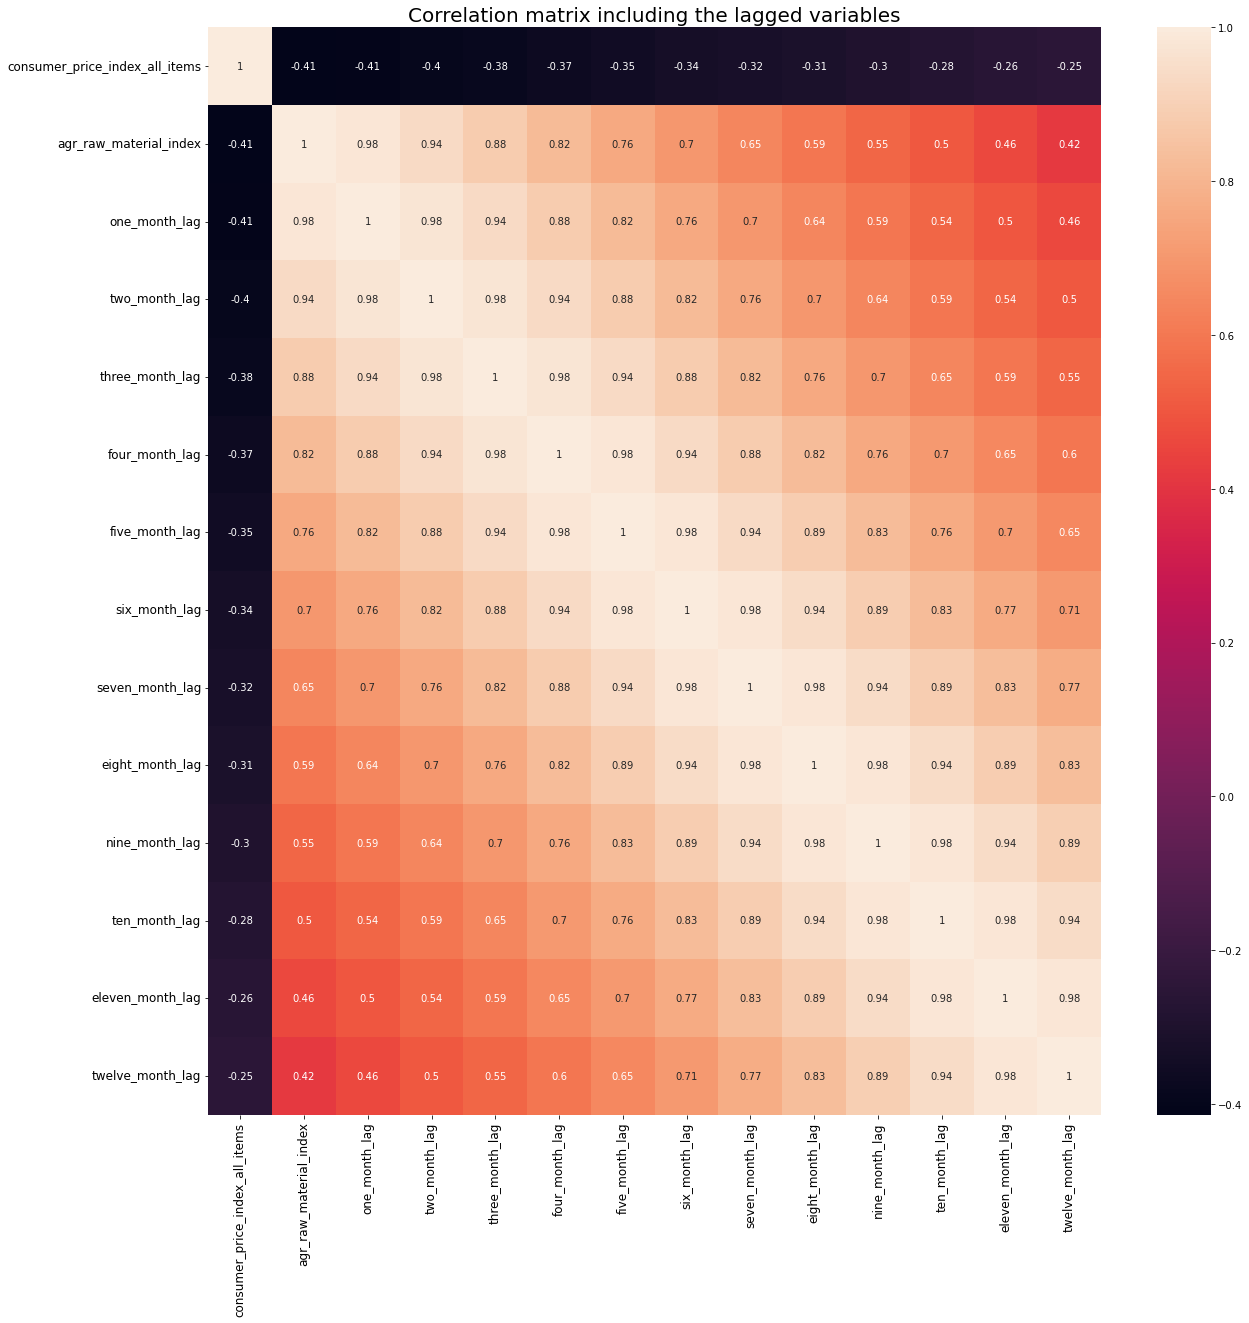

In [22]:
# correlation heatmap with seaborn excluding outlier countries
f,ax = plt.subplots(figsize = (20,20))
corr = sns.heatmap(df_cpi_arm_lag_vars[df_cpi_arm_lag_vars['outlier_country_flag'] == 'Non-outlier country'].iloc[:, 4:18].corr(), annot = True, annot_kws = {'size' : 10}, ax = ax)
ax.tick_params(labelsize = 12)
plt.title('Correlation matrix including the lagged variables', fontsize = 20)
plt.savefig(os.path.join(path, '4. Analysis', 'Correlation matrix with lag variables.png'), bbox_inches = 'tight')

## Evaluation of the correlation matrix

The correlation between the chosen variables gets weeker as lag periods progress 

## Exporting dataframe with lagged variables


In [23]:
# expoting the dataframe with lagged variables
df_cpi_arm_lag_vars.to_csv(os.path.join(path, '2. Data', 'Prepared Data', 'chosen_cpi_and_pcps_variables_with_lagged_variables_csv.csv'), index = False)
df_cpi_arm_lag_vars.to_pickle(os.path.join(path, '2. Data', 'Prepared Data', 'chosen_cpi_and_pcps_variables_with_lagged_variables_pkl.pkl'))